# Evaluation of the Graph-based SLAM algorithm
Including
- Graph-based SLAM algorithm (Accuracy and Speed)
- Occupancy Grid Mapping algorithm (Speed)
- A* Path Planning (Speed)

<img src="pic\sim_config.png">

## How to use?
1. Please load the configuration file **config.yaml** while starting the simulator;
2. Make sure that the attribute of **evalution** is enabled and **save_csv_data** is true;
3. Start the simulator and load one of the maps **graph_based_slam_example_1** to **graph_based_slam_example_8**;
4. Click the play button and let the simulator run for a while;
5. Click the button **Plot Slam Evaluation**, the estimation results will be shown in figures, and the raw data will be stored in the file **scripts/sobot_information1.csv** and **scripts/sobot_information2.csv** to analyse.
6. Click the button of **Start Mapping** if you want to evaluate the mapping algorithm, but make sure that the attribute **mapping** has been enabled.
7. Run all cells in the notebook to obtain figures, make sure that the inital working directory is **"./sobot_rimulator/script"**
8. the resulting figures will be in the file **scripts/fig**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')  # set the working directory as "./sobot_rimulator"
os.getcwd()

'/home/yixing/code/project_work/sobot-rimulator'

In [2]:
filename_evaluation = "scripts/sobot_information1.csv"
filename_runtime = "scripts/sobot_information2.csv"

## 1. Accuray of the Graph-based SLAM Evaluation
This analysis is based on the file sobot_information1.csv

In [3]:
df = pd.read_csv(filename_evaluation, index_col=0)
df.head(5)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,21,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.15079165003632802, 0.24709369178616, 2.730...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.16177054180753817, 0.26432764083670973, 2....",Graph-based SLAM
1,22,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.16476234415566565, 0.2513661170378793, 2.9...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.17526976625542068, 0.2700683734127768, 2.9...",Graph-based SLAM
2,23,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.18154180114866222, 0.2525282964953975, -3....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.19168585612143194, 0.2729139730093493, -3....",Graph-based SLAM
3,24,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.20182566159721174, 0.25021888860940056, -2...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2121393525993701, 0.2718155557797013, -2.9...",Graph-based SLAM
4,25,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.22538955139660954, 0.2450205099201408, -2....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.23590560324456575, 0.2672314668394577, -2....",Graph-based SLAM


In [4]:
df_lm = df[["sim_circle", "slam_name", "landmark_id", "estimated_landmark_position", "actual_landmark_position"]]
actual_landmark_position =  np.array([eval(x)[0:2] for x in df_lm["actual_landmark_position"].tolist()])
estimated_landmark_position = np.array([eval(x) for x in df_lm["estimated_landmark_position"].tolist()])
distance = np.linalg.norm(actual_landmark_position-estimated_landmark_position, axis = 1)
df_lm.loc[:, 'distance'] = distance
df_lm_sum = df_lm.groupby(['sim_circle','slam_name'])["distance"].mean().unstack(level = -1)

/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [5]:
df_robot = df[["sim_circle","estimated_robot_pose","actual_robot_pose","slam_name"]]
df_robot = df_robot.drop_duplicates(["sim_circle", "slam_name"])
estimated_robot_pose = np.array([eval(x)[0:2] for x in df_robot["estimated_robot_pose"].tolist()])
actual_robot_pose = np.array([eval(x)[0:2] for x in df_robot["actual_robot_pose"].tolist()])
distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
df_robot.loc[:, 'distance'] = distance
df_robot_pivot = df_robot.pivot(index = "sim_circle", columns = "slam_name", 
            values="distance")

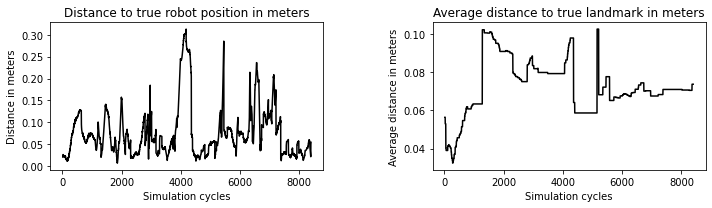

In [11]:
plt.subplot(1,2,1)
df_robot_pivot["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(10,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance in meters")
plt.title("Distance to true robot position in meters")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')
plt.subplot(1,2,2)
df_lm_sum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(10,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance in meters")
plt.title("Average distance to true landmark in meters")
plt.savefig('./scripts/fig/{0}.eps'.format("fig3"), format='eps', bbox_inches='tight')

In [7]:
df2 = pd.read_csv(filename_runtime, index_col=0)
df2.head(5)

,sim_circle,name,time_per_update
0,1,Graph-based SLAM,0.000054
1,1,OccupancyGridMapping2d,0.000311
2,1,A Star planning,0.000001
3,2,Graph-based SLAM,0.000059
4,2,OccupancyGridMapping2d,0.000666


In [8]:
df2_mean = df2.groupby(["sim_circle", "name"])["time_per_update"].mean().unstack()

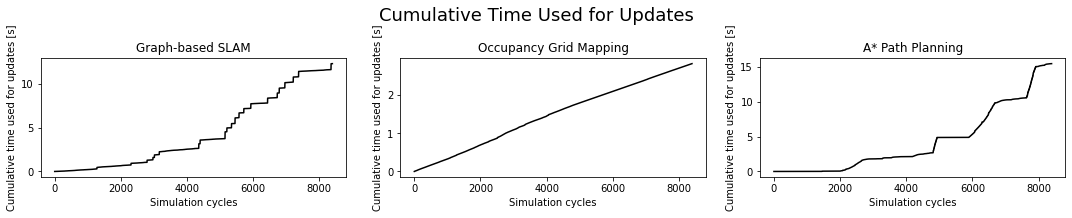

In [13]:
df2_cum = df2_mean.cumsum()
plt.subplot(1,3,1)
df2_cum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Graph-based SLAM")

plt.subplot(1,3,2)
df2_cum["OccupancyGridMapping2d"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Occupancy Grid Mapping")

plt.subplot(1,3,3)
df2_cum["A Star planning"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("A* Path Planning")

plt.suptitle("Cumulative Time Used for Updates", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')